In [1]:
from scripts.ClusterTS_MDS import ClusterMDS
from numpy import loadtxt, float32
from pandas import DataFrame

import matplotlib.pyplot as plt
import colorcet as cc
from matplotlib import rcParams
rcParams.update({
    "text.usetex": True,
})

In [2]:
PTEX_dissim = loadtxt("../data/PTEX_DTW_matrix.dat", dtype= float32, delimiter = ",")

In [3]:
MDS_method = "SMACOF-dissim-classic"
number_dims = tuple(range(2, 11))

cluster_methods = ("K-Means", "GaussMix")
number_clusters = tuple(range(2, 11))

TEC_ClusterSeries = ClusterMDS(dissimilarity = PTEX_dissim)

metrics_SMACOF_euclidean_classic_results = list()
metrics_SMACOF_dtw_classic_results = list()

## SMACOF utilizando matriz DTW y matriz euclidiana por factor de corrección con base a solución MDS clásica

In [4]:
for num_dims in number_dims:
    TEC_ClusterSeries.ComputeMDS(num_comps_mds = num_dims, method = MDS_method, max_iter = 2000, eps = 1e-6, verbose = 0, visualize_shepard = False)

    for cluster_method in cluster_methods:
        for num_clusters in number_clusters:
            cluster_metrics = TEC_ClusterSeries.ClusterTSVectors(num_clusters = num_clusters, cluster_method = cluster_method, max_iter = 10_000)
            cluster_metrics = {"Method": cluster_method, "Dims": num_dims, "Clusters": num_clusters} | cluster_metrics
                
            metrics_SMACOF_dtw_classic_results.append(cluster_metrics)

/home/federico/.local/lib/python3.13/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 65 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/home/federico/.local/lib/python3.13/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 33 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/home/federico/.local/lib/python3.13/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 17 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/home/federico/.local/lib/python3.13/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 9 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/home/federico/.local/lib/python3.13/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid si

SMACOF-dissim-classic with 2 components has a stress-1 value of 0.108372
SMACOF-dissim-classic with 3 components has a stress-1 value of 0.063821
SMACOF-dissim-classic with 4 components has a stress-1 value of 0.049310
SMACOF-dissim-classic with 5 components has a stress-1 value of 0.042305
SMACOF-dissim-classic with 6 components has a stress-1 value of 0.038504
SMACOF-dissim-classic with 7 components has a stress-1 value of 0.036460
SMACOF-dissim-classic with 8 components has a stress-1 value of 0.035290
SMACOF-dissim-classic with 9 components has a stress-1 value of 0.034444
SMACOF-dissim-classic with 10 components has a stress-1 value of 0.033899


## Metricas de evaluación

In [5]:
metrics_SMACOF_dtw_classic_results = DataFrame(metrics_SMACOF_dtw_classic_results)
metrics_SMACOF_dtw_classic_results

,Method,Dims,Clusters,SH_score,CH_score,DB_score
0,K-Means,2,2,0.645795,8199.580078,0.568039
1,K-Means,2,3,0.704062,12464.255859,0.457250
2,K-Means,2,4,0.662962,11650.318359,0.604808
3,K-Means,2,5,0.571974,11712.665039,0.677969
4,K-Means,2,6,0.541840,11313.933594,0.681109
...,...,...,...,...,...,...
157,GaussMix,10,6,0.242046,2737.137451,2.163803
158,GaussMix,10,7,0.200607,2502.307861,1.819463
159,GaussMix,10,8,0.200693,2238.511963,1.700150
160,GaussMix,10,9,0.180414,2161.071777,2.026747


In [7]:
def get_best_n_cluster_results(metrics_df) -> DataFrame:
    scores_names = ["SH_score", "CH_score", "DB_score"]
    indexes_by_score = dict()
    ordered_solution_by_score = dict()

    for score_name in scores_names:
        if score_name == "SH_score" or score_name == "CH_score":
            best_scores_idx = metrics_df.groupby("Dims")[score_name].idxmax()
        else:
            best_scores_idx = metrics_df.groupby("Dims")[score_name].idxmin()
        indexes_by_score[score_name] = best_scores_idx

        best_metrics_per_score = metrics_df[["Method", "Dims", "Clusters", score_name]].loc[best_scores_idx]
        ordered_solution_by_score[score_name] = best_metrics_per_score
    
    return ordered_solution_by_score

best_cluster_solutions_by_dimension = get_best_n_cluster_results(metrics_SMACOF_dtw_classic_results)

In [8]:
best_cluster_solutions_by_dimension

{'SH_score':       Method  Dims  Clusters  SH_score
 1    K-Means     2         3  0.704062
 19   K-Means     3         3  0.666697
 37   K-Means     4         3  0.654888
 55   K-Means     5         3  0.649206
 73   K-Means     6         3  0.646068
 92   K-Means     7         4  0.646362
 109  K-Means     8         3  0.643110
 127  K-Means     9         3  0.642465
 145  K-Means    10         3  0.641970,
 'CH_score':       Method  Dims  Clusters      CH_score
 1    K-Means     2         3  12464.255859
 19   K-Means     3         3   8829.834961
 37   K-Means     4         3   8253.143555
 55   K-Means     5         3   8025.682617
 73   K-Means     6         3   7932.884766
 91   K-Means     7         3   7883.634277
 109  K-Means     8         3   7853.528320
 127  K-Means     9         3   7837.043945
 145  K-Means    10         3   7824.377441,
 'DB_score':       Method  Dims  Clusters  DB_score
 1    K-Means     2         3  0.457250
 19   K-Means     3         3  0.575820
 3

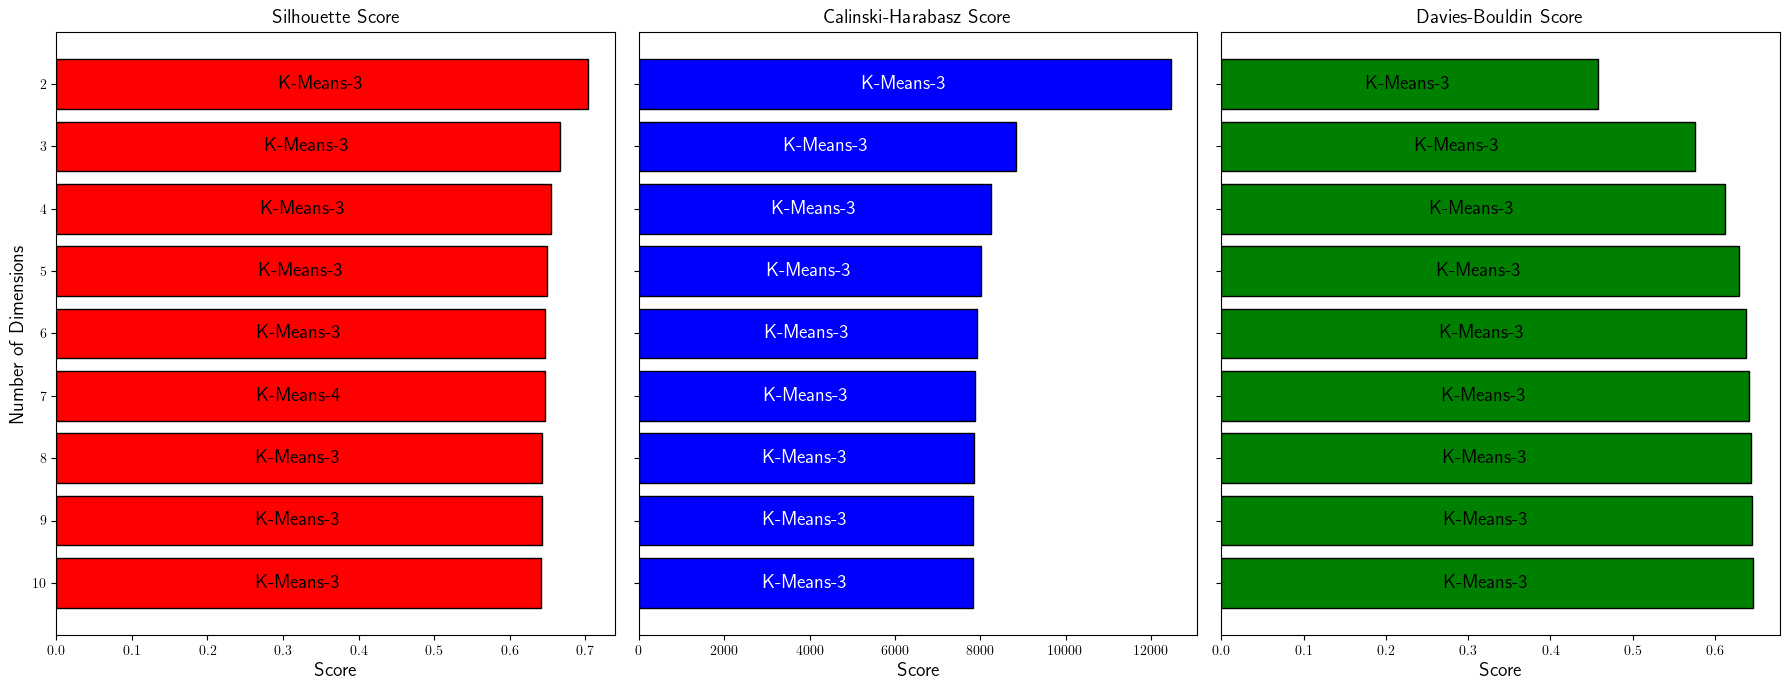

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 7), sharey=True)
subplots_titles = ("Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score")
subplots_colors = ("red", "blue", "green")
subplots_text_colors = ("black", "white", "black")

for k, score_name in enumerate(best_cluster_solutions_by_dimension.keys()):
    # Obtener listas de valores
    score_values = best_cluster_solutions_by_dimension[score_name][score_name].tolist()
    dims = best_cluster_solutions_by_dimension[score_name]["Dims"].tolist()
    methods = best_cluster_solutions_by_dimension[score_name]["Method"].tolist()
    clusters = best_cluster_solutions_by_dimension[score_name]["Clusters"].tolist()

    # Anotaciones con el modelo y número de clusters
    annotations = [f"{m}-{c}" for m, c in zip(methods, clusters)]

    ax = axes[k]
    ax.barh(dims, score_values, color=subplots_colors[k], edgecolor='black')
    ax.set_yticks(dims)

    # Añadir anotaciones en la mitad de cada barra
    for y, x, label in zip(dims, score_values, annotations):
        ax.text(x / 2.0, y, label, va='center', ha='center',
                fontsize= 14, color = subplots_text_colors[k])

    # Configuraciones del subplot
    ax.set_title(subplots_titles[k], fontsize=14, fontweight='bold')
    ax.set_xlabel('Score', fontsize=14)
    ax.invert_yaxis()  # Opcional: para que las menores dimensiones estén arriba

axes[0].set_ylabel('Number of Dimensions', fontsize=14)

fig.tight_layout()
plt.show()